There is a bar in my neighborhood with an interesting premise. One of the pages on their menu states the following:

<img src="https://images.squarespace-cdn.com/content/v1/623506f9b920e800d3ca41c2/85dcaaea-ecd0-4bcd-a38c-2ea70a61e290/DM.png?format=2500w" width="300"/>

To summarize:

"Roll a die with 20 sides."

"The number rolled determines which secret cocktail you'll receive. [...]"

"You may re-roll if you land on something you rolled before, but rolling [any repeat] 3 times in a row means you get that number regardless. [...]"

I remember reading this and immediately being curious about the expected number of drinks one would have to buy to complete this list. Doing some research, I found a puzzle in probability theory called [The Coupon Collector's Problem](https://en.wikipedia.org/wiki/Coupon_collector%27s_problem), which presented a very similar question: "Given n coupons, how many coupons do you expect you need to draw with replacement before having drawn each coupon at least once?"

The good news is that there is an equation to solve this:

$$\sum_{i=1}^{n}\frac{1}{\frac{(n-i)}{n}}$$
<p style="text-align: center;">(where n = number of unique coupons)</p>

Let's break this down and start simple with the innermost part, which gives us the probability of getting a new coupon when we've already got <i>i</i> out of <i>n</i> coupons:

$$\frac{(n-i)}{n}$$

For example if we've already got <b><i>i = 15</i></b> out of a total <b><i>n = 20</i></b>, then we can expect a 25% chance of getting a new number on our next pull. We can also express the expected number of attempts as the inverse of this probability:

$$\frac{1}{\frac{(n-i)}{n}}$$

In our case of <b><i>i = 15</i></b>, it would take an average 1.33 times (20/15) to get a new number. From here we can just sum all of the numbers we would need, which would be 1 through <b><i>n</i></b>:

$$\sum_{i=1}^{n}\frac{1}{\frac{(n-i)}{n}}$$

We're now close to the equation we'd need, but with one complication - we have three attempts on each trial to get a new drink (or coupon). To calculate this, we'll need to figure out the probability of <i>not</i> getting  a new number in three rolls, and take the compliment of that, which can be done as follows:

$${1-(1-(\frac{(n-i)}{n}))^3}$$

We can now replace our original term in the denominator with this new one, and we have our equation!

$$\sum_{i=1}^{n}\frac{1}{1-(1-(\frac{(n-i)}{n}))^3}$$

Let's code this up in Python so we can try experimenting with it a bit. We'll start with writing a function to calculate the probability of getting your <i>i<sup>th</sup></i> drink on the next roll.

In [8]:
def prob_of_new_number(n_already_rolled):
    return 1 - (1 - ((20 - n_already_rolled)/20))**3

From here we can iterate through each number one would need to complete their card (1-20). By taking the sum of the reciprocals we get the total number of drinks on average that would be required to complete this challenge.

In [28]:
expected_trials = []

for i in range(20):
    expected_trials.append(1/prob_of_new_number(i))

print('Expected number of trials: {:.1f}'.format(sum(expected_trials),1))

Expected number of trials: 33.9


This number surprised me, my guess was closer to 50 while building this out. 

As a sanity check, let's also build out a script that simulates customers, each of which rolls for every number and tracks their progress. This will be completely independent from the equation above, so we hope to see a similar number.

In [47]:
import random
import math
import numpy as np

random.seed(1)

def run_sim():
    numbers_already_rolled = []
    tries_left = 3
    number_of_trials = 0
    
    while len(numbers_already_rolled) < 20:
        current_roll = random.randint(1,20)
        if current_roll not in numbers_already_rolled:
            numbers_already_rolled.append(current_roll)
            tries_left = 3
            number_of_trials += 1
        elif tries_left > 1:
            tries_left -= 1
        else:
            tries_left = 3
            number_of_trials += 1
    
    return number_of_trials

Let's run this for 100,000 simulated customers and see where we land.

In [30]:
outcomes = []

for _ in range(100000):
    outcomes.append(run_sim()) 
    
sim_number_of_trials = np.mean(outcomes)
print('Mean expected trials: {:.1f}'.format(sim_number_of_trials))

Mean expected trials: 33.9


Looks spot on! It's good to see we're hitting 33.9 (realistically 34) with both strategies. Also curious to see what the distribution looks like here.

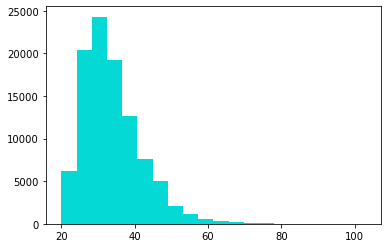

In [50]:
import matplotlib.pyplot as plt
plt.hist(outcomes, bins=20, color='#05D9D6') 
plt.show()

Some lucky individuals managed to get all 20 within 25 attempts! Alternatively, some poor souls are still waiting to get all 20 drinks at their 80th attempts, yikes.

Lastly, it would be great to know how much money this experience is expected to cost over time. To be thorough, we'll also include the MA state tax of 6.25% and a 20% tip.

In [48]:
print('Total cost ($16 per drink, plus tip and tax): ${:.2f}'.format(math.ceil(sim_number_of_trials) * 16 * 1.2625))

Total cost ($16 per drink, plus tip and tax): $686.80


There we have it! One can expect to spend $686.80 on average to complete this. I'll leave it to the reader whether or not to consider this financially responsible, although access to a secret menu afterwards makes this all the more tempting.